In [89]:
import ir_datasets
import pandas as pd

dataset = ir_datasets.load("cord19")

data = []

for doc in dataset.docs_iter()[:20000]:  
 
    data.append({
        "doc_id": doc.doc_id,
        "title": doc.title,
        "doi": doc.doi,
        "date": doc.date,
        "abstract": doc.abstract
    })

df = pd.DataFrame(data)

df.to_csv("covid_dataset.csv", index=False)

print("Dataset saved to covid_dataset.csv")

Dataset saved to covid_dataset.csv


## Context

The objective of the project is to do an information search system, including work on data collection and preparation, information querying and retrieval, and retrieval evaluation.

The dataset used is a collection of scientific articles related to COVID-19. It uses the 2020-07-16 version of the dataset, corresponding to the "complete" collection used for TREC COVID.

## Characterization


### Collection Characterization
The data set consists of abstracts of articles published on the covid, has the following attributes:
- `doc_i`: Document identifier
- `title`: Article title
- `doi`: Digital Object Identifier (DOI)
- `date`: Publication date
- `abstract`: Article abstract


We selected approximately 20000 rows from the original dataset for our analysis, ensuring that all entries included an abstract.




### Document Presentation
An example of the data from our dataset is shown below:

In [90]:
df.head(5)

,doc_id,title,doi,date,abstract
0,ug7v899j,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,2001-07-04,OBJECTIVE: This retrospective chart review des...
1,02tnwd4m,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,2000-08-15,Inflammatory diseases of the respiratory tract...
2,ejv2xln0,Surfactant protein-D and pulmonary host defense,10.1186/rr19,2000-08-25,Surfactant protein-D (SP-D) participates in th...
3,2b73a28n,Role of endothelin-1 in lung disease,10.1186/rr44,2001-02-22,Endothelin-1 (ET-1) is a 21 amino acid peptide...
4,9785vg6d,Gene expression in epithelial cells in respons...,10.1186/rr61,2001-05-11,Respiratory syncytial virus (RSV) and pneumoni...


### Removing Rows with Invalid Data Formats

In [91]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(f"Original number of rows: {len(df)}")

df = df.dropna(subset=['date'])
print(f"Number of rows after removing NaT entries: {len(df)}")

Original number of rows: 20000
Number of rows after removing NaT entries: 17696


### Exploratory Data Analysis
#### title

In [92]:
distinct_titles = df['title'].nunique()
total_titles = df['title'].count()

percentage_unique = (distinct_titles / total_titles) * 100

print(f"The dataset contains {percentage_unique:.1f}% unique titles.")

The dataset contains 96.7% unique titles.


#### date

In [93]:
distinct_dates = df['date'].nunique()
total_dates = df['date'].count()

percentage_unique = (distinct_dates / total_dates) * 100

print(f"The dataset contains {percentage_unique:.1f}% unique dates.")

The dataset contains 28.9% unique dates.


In [94]:
min_date = df['date'].min()
max_date = df['date'].max()

diff_years = round((max_date - min_date).days / 365.25)
min_date_year = min_date.year
max_date_year = max_date.year

print(f"Documents span from {min_date_year} to {max_date_year}, a total of {diff_years} years.")

Documents span from 1962 to 2020, a total of 58 years.


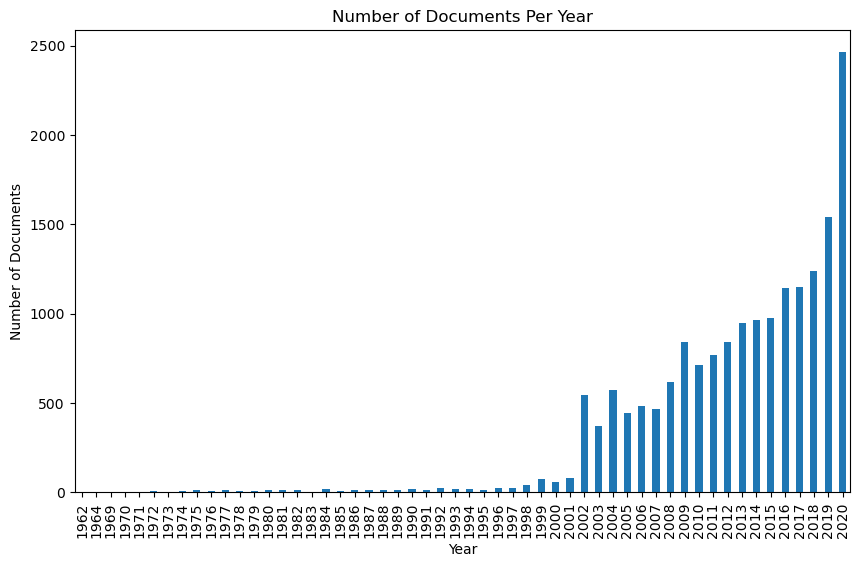

In [95]:
import matplotlib.pyplot as plt

df['year'] = df['date'].dt.year
documents_per_year = df.groupby('year').size()

plt.figure(figsize=(10,6))
documents_per_year.plot(kind='bar')
plt.title('Number of Documents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Documents')
plt.show()

## Prospective Search Task

### Description

The aim of this project is to build an information retrieval system that can effectively search and retrieve relevant scientific articles on COVID. The system should handle multiple query types across various topics and provide comprehensive results. Below are the key search tasks:

### Search Tasks

1. **Find articles about specific COVID variants by their name (e.g., Delta, Omicron) or genomic mutations.**

2. **Search information about COVID spread (e.g. its transmission routes).**

3. **Search for COVID symptoms, diagnostic criteria, and clinical presentation.**  

4. **Search therapeutic strategies, clinical management of COVID cases, and recovery protocols** 

5. **Search developed vaccines, their efficacy, distribution, and the use of therapeutic drugs.**

